### Problem Description

- The dataset is sourced from Kaggle (Machine Learning Group - ULB, 2018). The original data comes from ULB's Machine Learning Group. 
- The dataset contains transactions that were made during a 2-day period by European cardholders on their credit card in September, 2013. There are over 284k samples in the dataset. 
- The dataset contains numerical variables only. Due to the sensitive nature of the dataset, the authors have performed `Principal Component Analysis` to combine the original features into a few columns. The PCA generated features are labeled V1 to V28. 
- There are only 2 features that didn't go through PCA
    - Time
    - Amount
- **Problem** - Identify a way to detect fraudulent transactions made on a credit card to prevent customers from being unnecessarily charged.
- This report will follow the following structure
    - Load the libraries & datasets
    - Perform extensive exploratory data analysis
    - Implement & evaluate an unsupervised machine learning model
    - Results
    - Conculsion & next steps


**Reference**

- Machine Learning Group - ULB (2018, March). Credit Card Fraud Detection, Version 3. Retrieved Apr 21, 2022 from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

#### Data Fields

- Time - Time difference in `seconds` between the first and $n^{th}$ transaction
- V1 to V28 - Features generated by the authors via PCA 
- Amount - Value of each transaction charged to the credit card
- Class - 1 if the transaction is fraud, 0 otherwise

### Load in the libraries &amp; dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FILE = "creditcard.csv"

In [143]:
df = pd.read_csv(DATA_FILE)

In [144]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [146]:
df.shape

(284807, 31)

### Exploratory Data Analysis

In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


- Let's drop the `Time` column since its analogous to an `id` column. 
- It doesn't tell us anything *unique* about any transaction in particular. It's just a measure of how much time has elapsed (in seconds) between the first transaction and $n^{th}$ transaction. 
- Therefore, we can safely drop it since it's practically useless for our modelling purposes. 

In [148]:
df = df.drop(columns=['Time'])

In [149]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- There are no null values in the dataset. 
- This is excellent news since we don't have to do any data imputation or drop any rows from our dataset.

Text(0.5, 1.0, 'Class Distributions \n (0: Valid, 1: Fraud)')

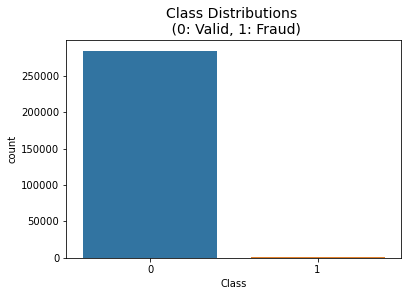

In [150]:
sns.countplot(x="Class",data=df)
plt.title('Class Distributions \n (0: Valid, 1: Fraud)', fontsize=14)

- The # of fraudulent transcations are really small.
- It's hard to guess the exact number from the plot above.

In [151]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- There are only 492 fraudulent transaction in the whole dataset.
- That's only 0.16%

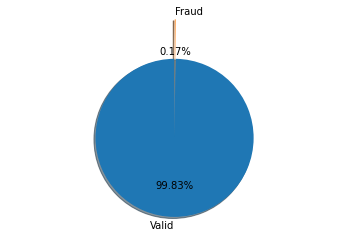

In [152]:
labels = ['Valid', 'Fraud']
sizes = df["Class"].value_counts().tolist()
explode = (0, 0.5)  # only "explode" the 2nd slice (i.e. 'Fraud')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

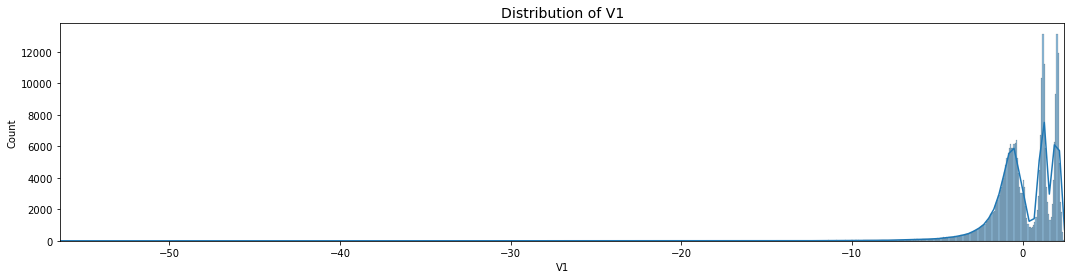

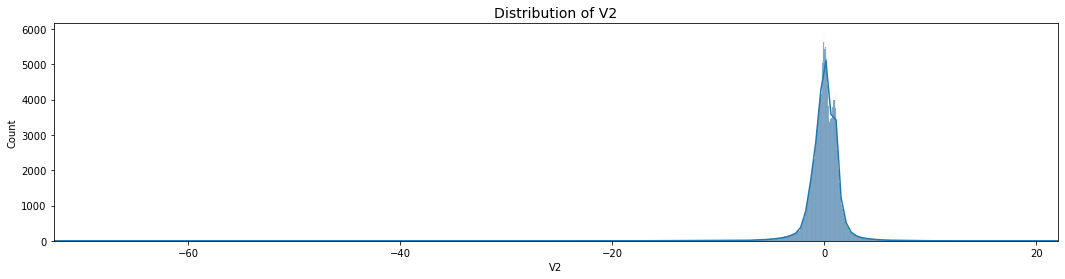

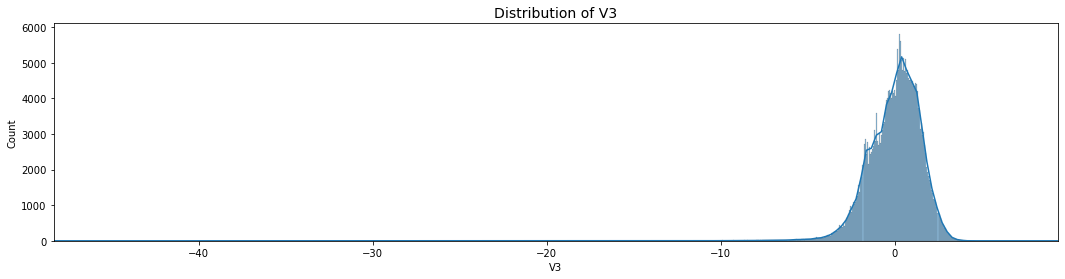

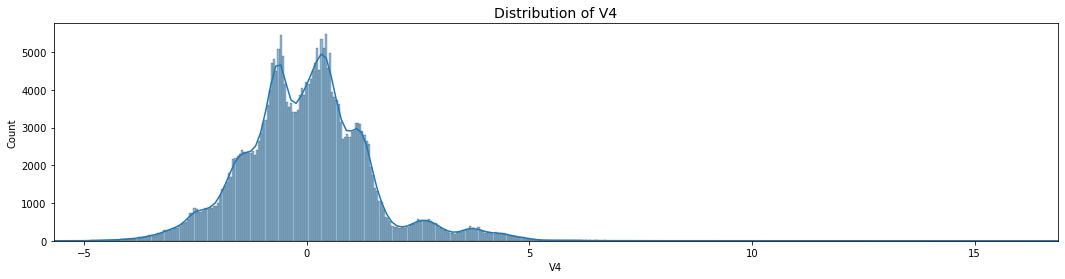

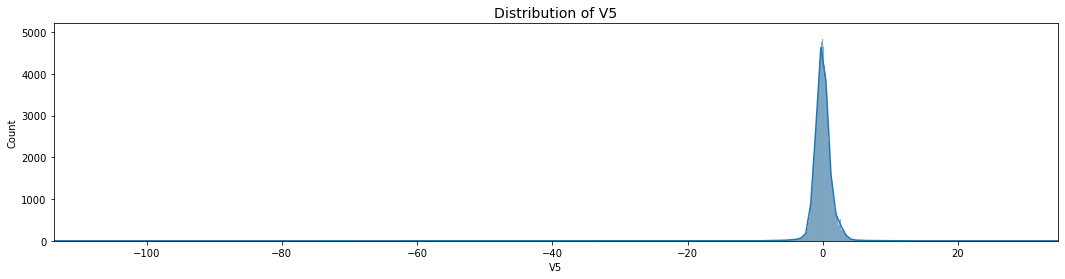

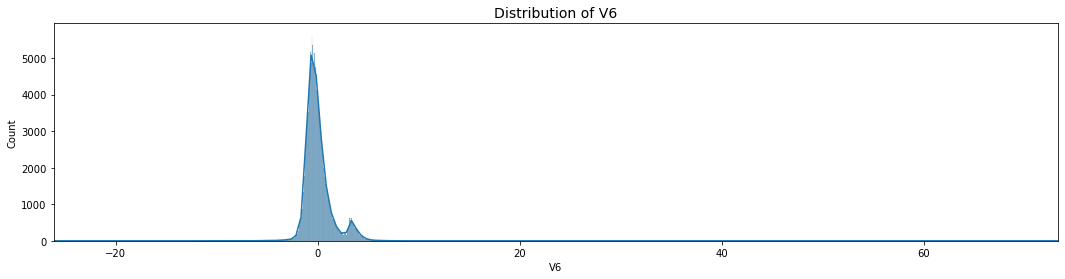

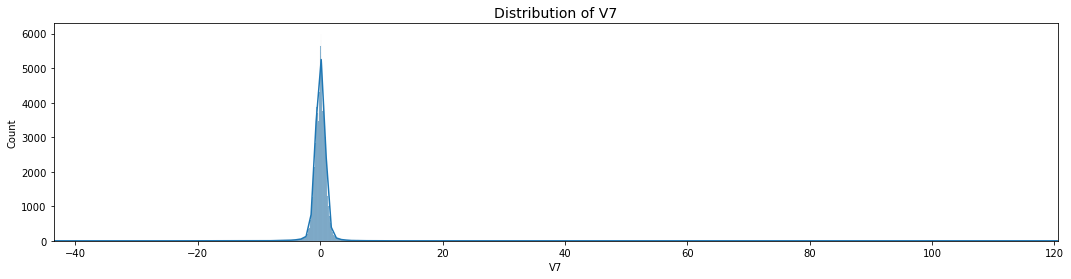

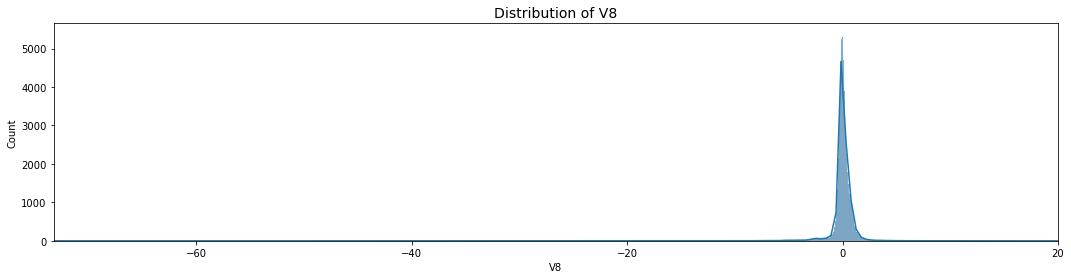

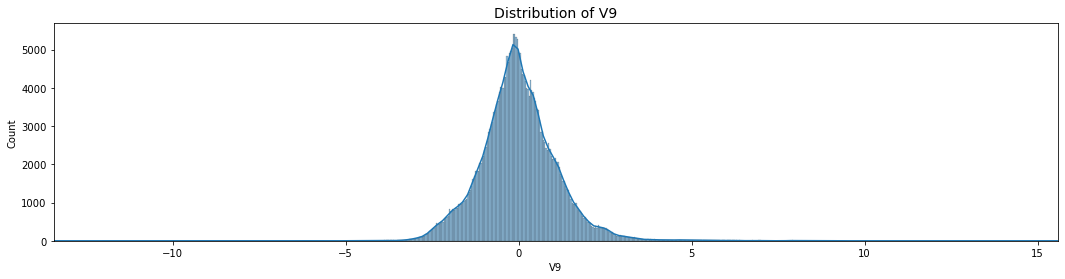

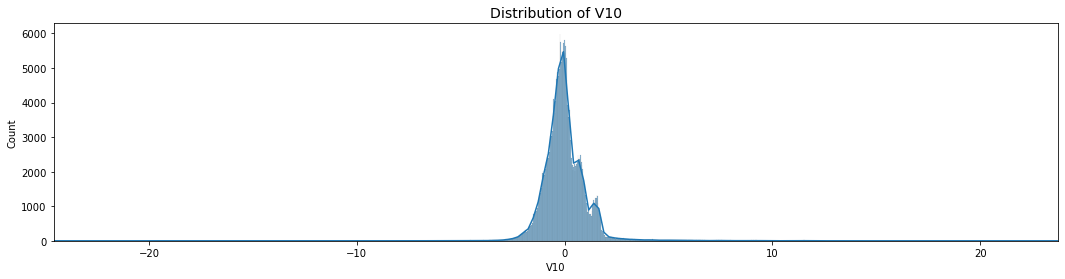

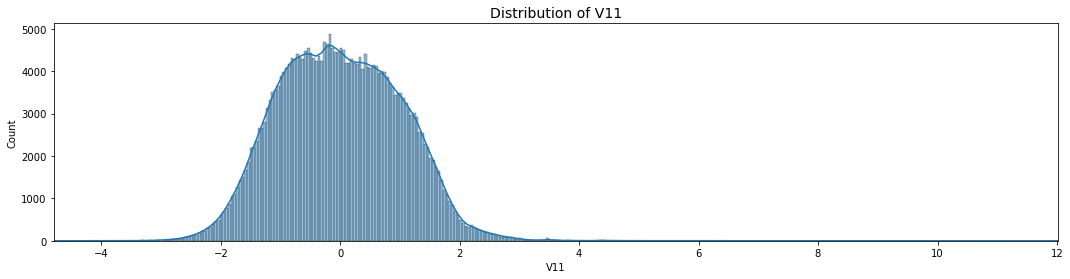

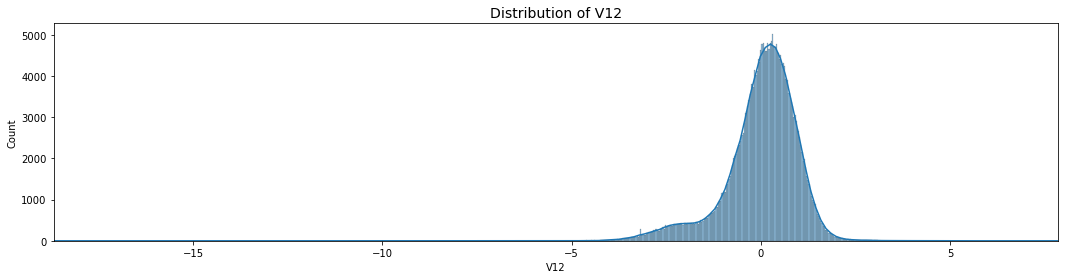

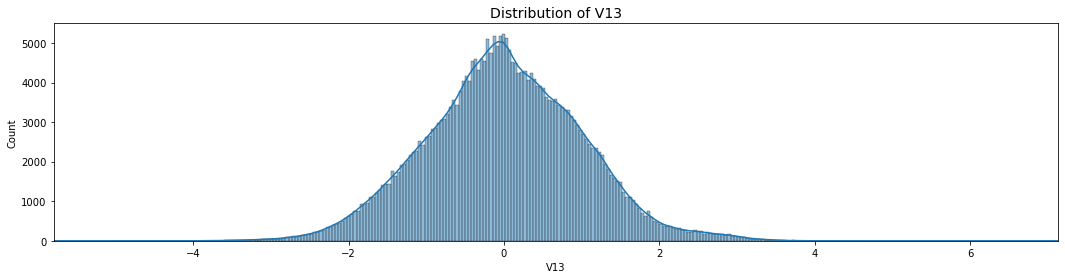

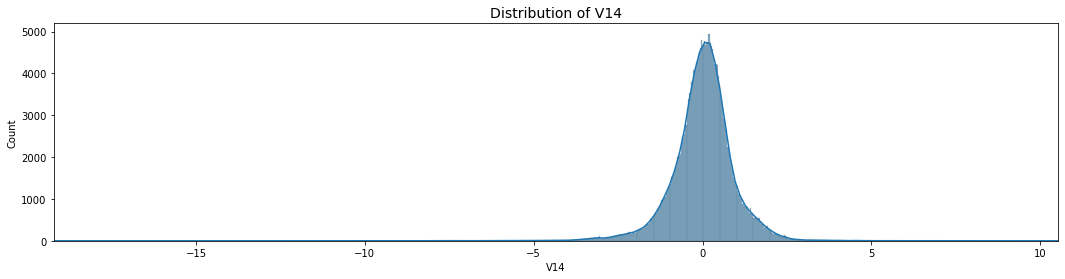

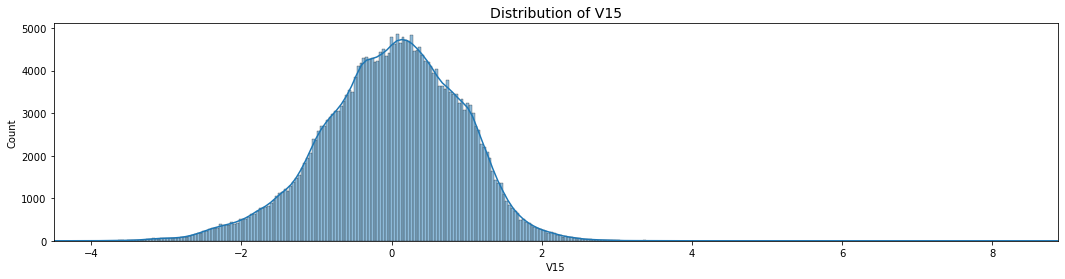

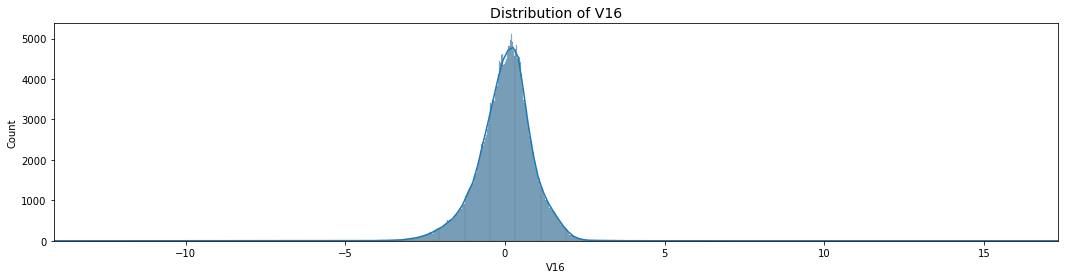

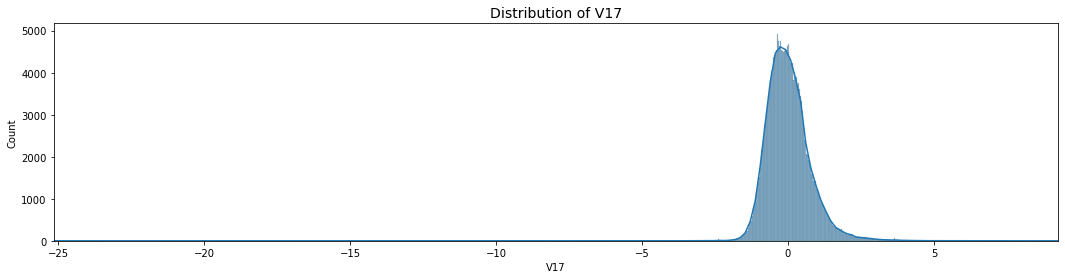

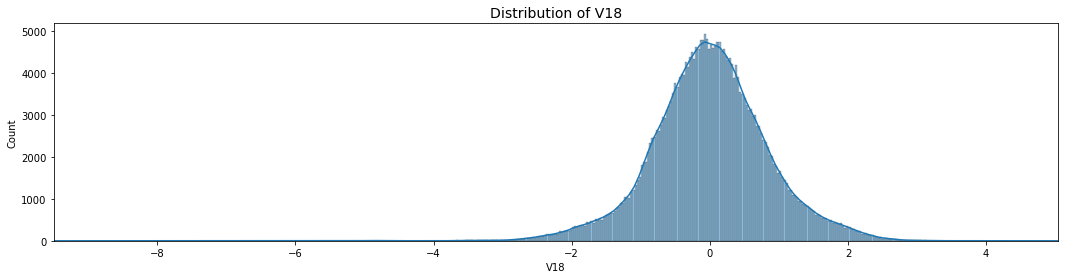

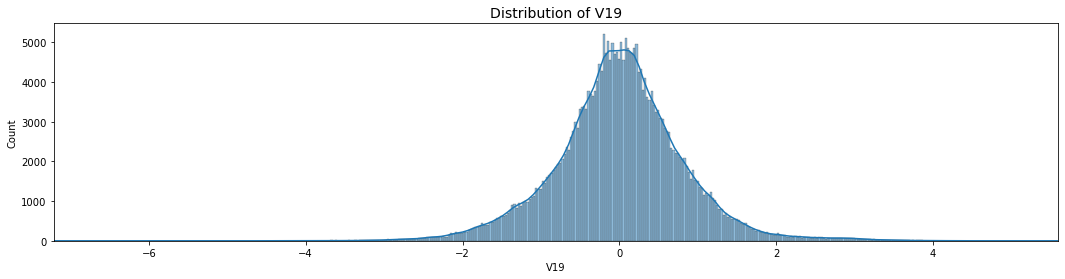

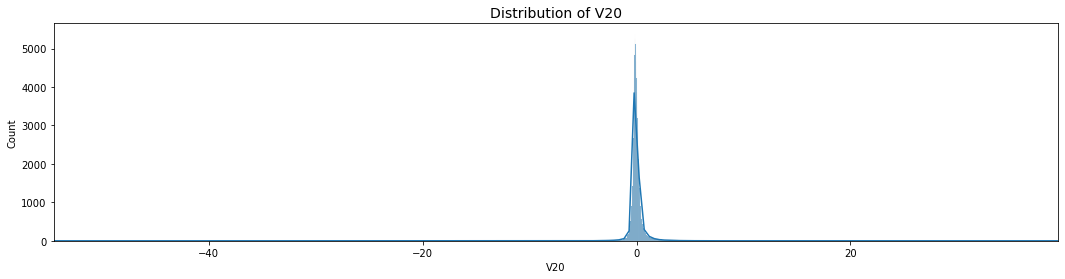

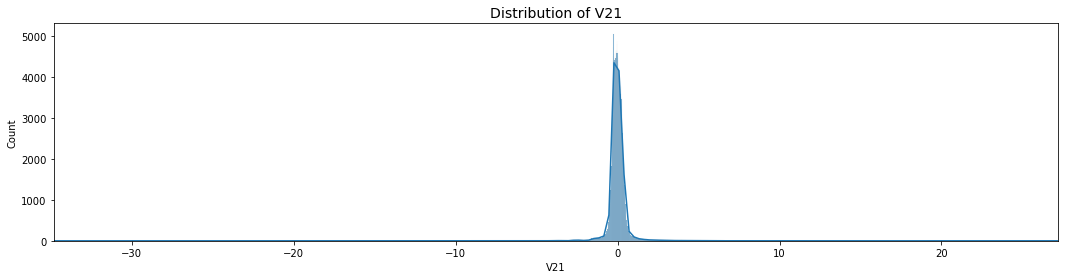

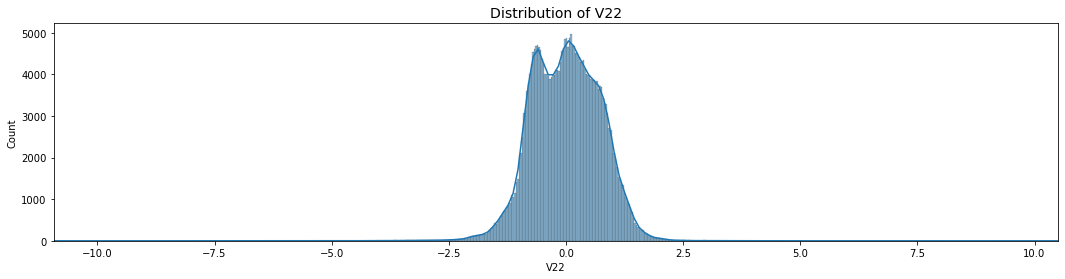

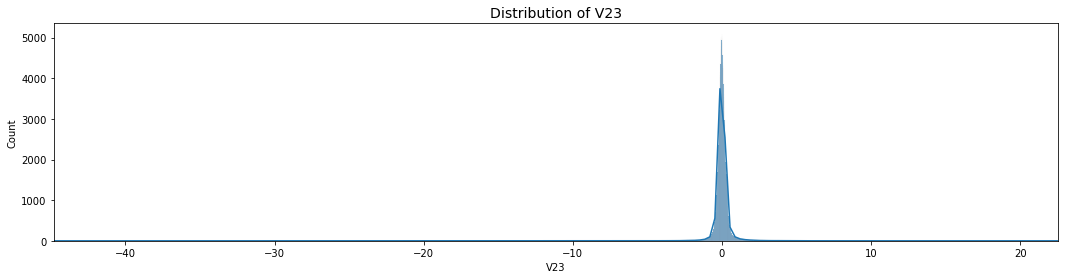

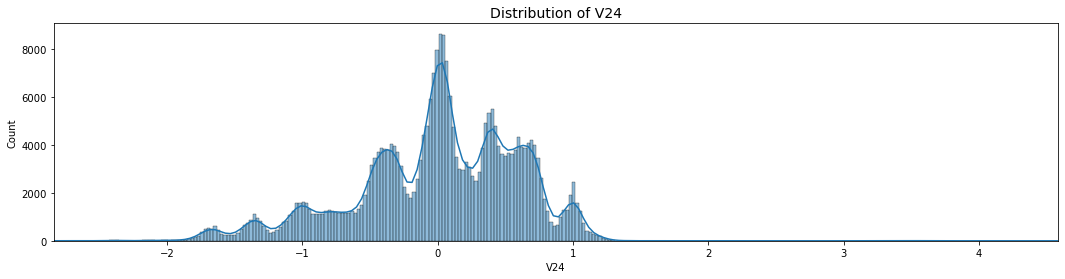

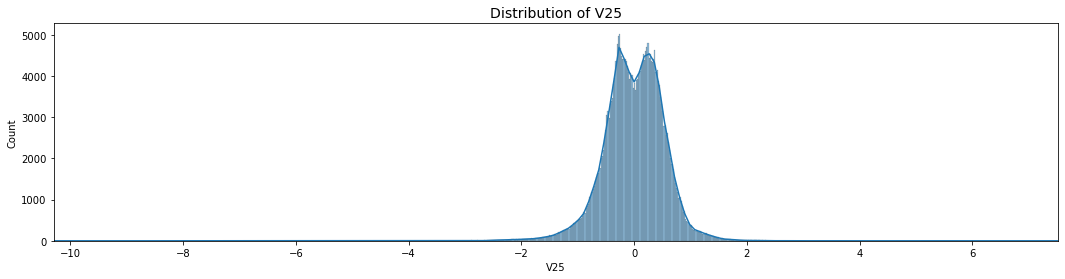

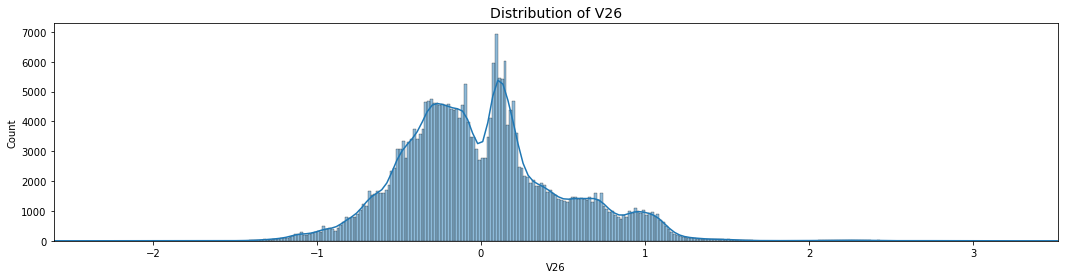

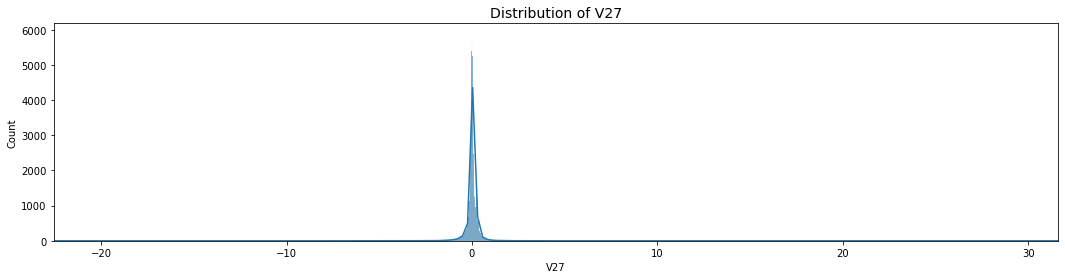

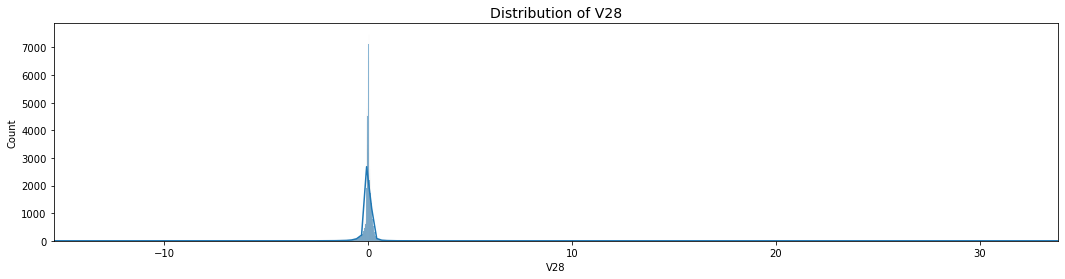

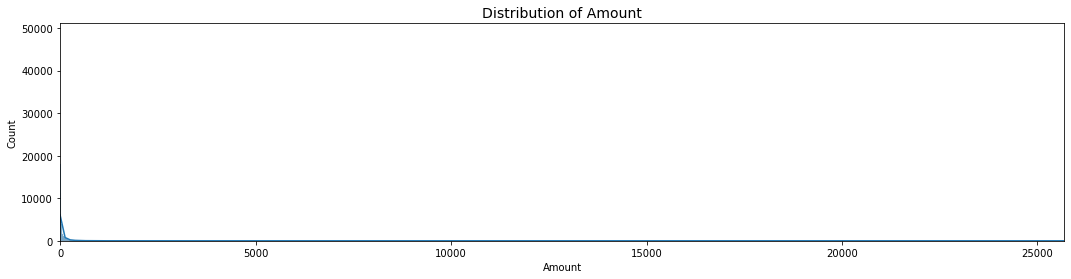

In [153]:
def distribution_plot(df,feature):
    
    feature_value = df[feature].values
    fig, ax = plt.subplots(1, 1, figsize=(18,4))
    sns.histplot(df[feature], ax=ax, kde=True)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlim([min(feature_value), max(feature_value)])

columns = df.columns.tolist()
for name in columns[:-1]: #Skip the Class column
    distribution_plot(df,name)

- The distribution plot of `Amount` is a little weird. 
- Perhaps, it might benefit from a log transformation? 

In [154]:
np.seterr(divide = 'ignore')
df["Amount"] = np.log2(df["Amount"])

ValueError: Axis limits cannot be NaN or Inf

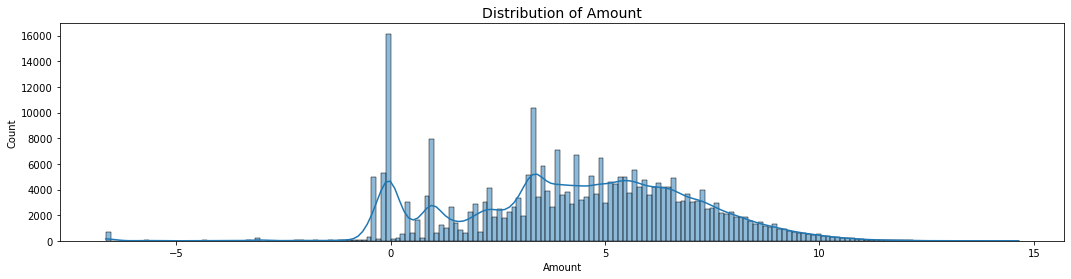

In [155]:
distribution_plot(df,'Amount')

- The plot looks a lot better.
- But that error is warning against `inf` axis. `inf` values in our dataset implies that some transactions were worth $\$0$. 
    - Why `inf`? Because $log_{2}0 = -\infty$
- Let's replace infinity values with `np.nan` and see how many rows exist with that value.

In [156]:
df["Amount"] = df["Amount"].replace([np.inf, -np.inf], np.nan)

In [157]:
df["Amount"].isnull().sum()

1825

In [158]:
df[df["Amount"].isnull()]["Class"].value_counts()

0    1798
1      27
Name: Class, dtype: int64

- There are 1825 rows with $0 in `amount` column.
- Of these, 27 belong to the fraudulent class. This is approx. 5% of the total number of fraud cases.
- For now, I'll be dropping all these `np.nan` values from the dataset. 
- We can always come back and reconsider this decision at a later stage. 

In [159]:
df = df.dropna(subset=["Amount"])

In [160]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Back to having 0 null values in the dataset.

### Modelling

- The problem we currently have on hand is equivalent of trying to find a needle in a haystack. In a dataset that consists of an incredibly high amount of *valid* transactions, we need to find a way to identify all the fradulent ones. 
- One of the ways to solve this problem would be to look at it from the prespective of finding outliers. Since the fraudulent transactions are so rare, they're a perfect fit with the outlier analogy.
- I, offcourse, don't mean to find outliers with the IQR method. I will be looking at some advanced modelling techniques to accomplish this task.
- One of the ways is `LocalOutlierFactor` found in sklearn's `neighbor` module. From [sklearn's website](https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor): 
    - > The neighbors.LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. 
    - The idea is to detect the samples that have a substantially lower density than their neighbors.

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, f1_score

- Extract features and response variables into X & y respectively

In [187]:
X = df.drop(['Class'], axis = 1)
y = df['Class'].values.copy()

- The models predict outliers as `-1` and inliers as `1`
- Let's modify the values in our reponse variable to reflect this fact
    - 1 represents a fraud transaction in our dataset. Replacing it with -1.
    - 0 represents a valid transaction in our dataset. Replacing it with 1.

In [191]:
y[y==1] = -1
y[y==0] = 1

- Let's split our dataset into training and test sets
- The test set represents 25% of the data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [194]:
fraction_fraud = len(y[y==-1])/len(y[y==1])
fraction_fraud

0.0016459186526828473

In [204]:
import itertools
classes = np.array(['1','-1'])

def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[1]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Local Outlier Factor

In [229]:
model = LocalOutlierFactor(contamination=fraction_fraud, n_jobs=-1)

In [230]:
y_train_pred = model.fit_predict(X_train)

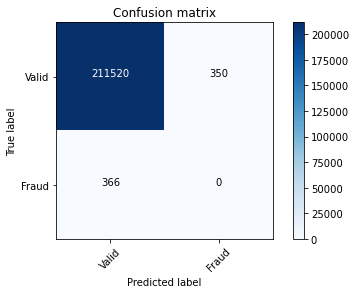

In [234]:
cm_train = np.flip(confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(cm_train,["Valid", "Fraud"])

In [232]:
y_test_pred = model.fit_predict(X_test)

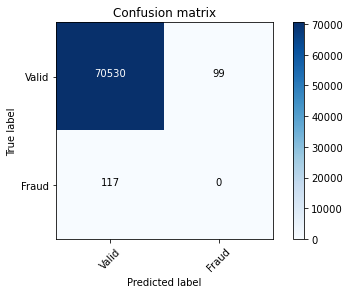

In [235]:
cm_test = np.flip(confusion_matrix(y_test_pred, y_test))
plot_confusion_matrix(cm_test,["Valid", "Fraud"])

- This modelling technique is definitely not working out for detecting fraud transactions.\
- The model's detecting `0` of the fraud transactions in both our training and test sets. Absolutely terrible.
- Let's try `Isolation Forest` from sklearn's `ensemble` module. 
- Due to a large number of features and data points, a random forest technique might perform better. 
    - As a recap: Random forests are a way of averaging multiple decision trees that are trained on different parts of the same training set. 

#### Isolation Forest

In [196]:
from sklearn.ensemble import IsolationForest

In [197]:
clf = IsolationForest(n_jobs=-1, random_state=42, max_samples='auto', bootstrap=True)

In [198]:
clf.fit(X_train)

IsolationForest(bootstrap=True, n_jobs=-1, random_state=42)

In [199]:
y_train_pred = clf.predict(X_train)

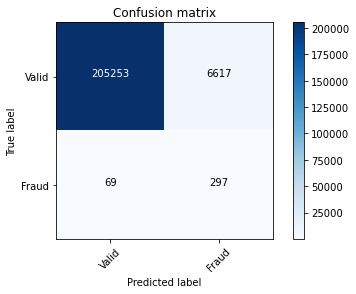

In [211]:
cm_train = np.flip(confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(cm_train,["Valid", "Fraud"])

In [212]:
y_test_pred = clf.predict(X_test)

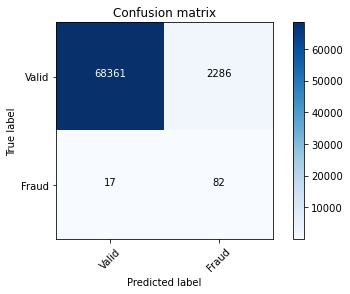

In [213]:
cm_test = np.flip(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(cm_test,["Valid", "Fraud"])

In [214]:
print(f'Total fraudulent transactions detected in test set: {cm_train[1][1]} of {cm_train[1][1]+cm_train[1][0]}')
print(f'Total valid transactions detected in test set: {cm_train[0][0]} of {cm_train[0][1]+cm_train[0][0]}')
print(f'Probability to detect a fraud transaction in the test set: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0]):0.2f}')
print(f'Probability to detect a valid transaction in the test set: {(cm_train[0][0]/(cm_train[0][1]+cm_train[0][0])):0.2f}')
print(f"Accuracy of unsupervised model on the test set: {100*(accuracy_score(y_test, y_test_pred)):0.2f}%")

Total fraudulent transactions detected in test set: 297 of 366
Total valid transactions detected in test set: 205253 of 211870
Probability to detect a fraud transaction in the test set: 0.81
Probability to detect a valid transaction in the test set: 0.97
Accuracy of unsupervised model on the test set: 96.74%


In [215]:
print(f'Total fraud transactions detected in test set: {cm_test[1][1]} of {cm_test[1][1]+cm_test[1][0]}')
print(f'Total valid transactions detected in test set: {cm_test[0][0]} of {cm_test[0][1]+cm_test[0][0]}')
print(f'Probability to detect a fraud transaction in the test set: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]):0.2f}')
print(f'Probability to detect a valid transaction in the test set: {(cm_test[0][0]/(cm_test[0][1]+cm_test[0][0])):0.2f}')
print(f"Accuracy of unsupervised model on the test set: {100*(accuracy_score(y_test, y_test_pred)):0.2f}%")

Total fraud transactions detected in test set: 82 of 99
Total valid transactions detected in test set: 68361 of 70647
Probability to detect a fraud transaction in the test set: 0.83
Probability to detect a valid transaction in the test set: 0.97
Accuracy of unsupervised model on the test set: 96.74%


- The model is _slightly_ better at detected fraud detections in the test set (0.83) compared to the train set (0.81)

#### Optimizing the hyperparameters

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [217]:
new_clf = None

In [223]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': [0.8, 0.9, 1.0]
}

f1sc = make_scorer(f1_score, average='micro')

model_if = IsolationForest(n_jobs=-1)
new_clf = GridSearchCV(model_if, param_grid=params, cv=5, n_jobs=-1, scoring=f1sc)

In [224]:
new_clf.fit(X_train, y_train) # need to pass in y_train for the scoring function

/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=IsolationForest(n_jobs=-1), n_jobs=-1,
             param_grid={'max_features': [0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400]},
             scoring=make_scorer(f1_score, average=micro))

### Results

In [225]:
new_clf.best_params_

{'max_features': 0.8, 'n_estimators': 400}

In [226]:
y_best_test_pred = new_clf.best_estimator_.predict(X_test)

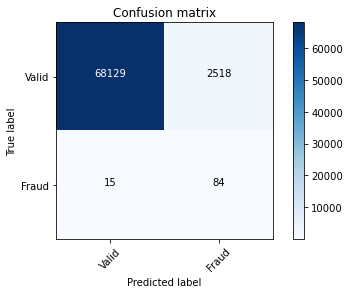

In [227]:
cm_best_test = np.flip(confusion_matrix(y_test, y_best_test_pred))
plot_confusion_matrix(cm_best_test,["Valid", "Fraud"])

In [228]:
print(f'Total fraud transactions detected in test set: {cm_best_test[1][1]} of {cm_best_test[1][1]+cm_best_test[1][0]}')
print(f'Total valid transactions detected in test set: {cm_best_test[0][0]} of {cm_best_test[0][1]+cm_best_test[0][0]}')
print(f'Probability to detect a fraud transaction in the test set: {cm_best_test[1][1]/(cm_best_test[1][1]+cm_best_test[1][0]):0.2f}')
print(f'Probability to detect a valid transaction in the test set: {(cm_best_test[0][0]/(cm_best_test[0][1]+cm_best_test[0][0])):0.2f}')
print(f"Accuracy of unsupervised model on the test set: {100*(accuracy_score(y_test, y_test_pred)):0.2f}%")

Total fraud transactions detected in test set: 84 of 99
Total valid transactions detected in test set: 68129 of 70647
Probability to detect a fraud transaction in the test set: 0.85
Probability to detect a valid transaction in the test set: 0.96
Accuracy of unsupervised model on the test set: 96.74%


- The probability of detecting fraud transactions went slightly up from `0.83` to `0.85`. Even though this isn't the greatest improve, I believe this is the best we can do with the current dataset and modelling techniques.
- An 83% chance of detecting a fraud transaction is incredibly good. 
- Side note: `Isolation Forest` doesn't have the feature importance feature like `Random Forest` because it chooses the feature to split at each node completely at random. Therefore, it's not possible to have that feature.

### Conclusion

- Based on the analysis done above, I would like to try some more advanced modelling techniques such as:
    - XGBoost
    - Neural Networks
- These more advanced models would be able to grasp a lot more of the intricacies of the complex relationships between all the features in our dataset. 
- The overall fraud detection rate achieved by the best model is 85%. This measure sounds really good to me. But it also depends on the business nee by most standards. I believe this can definitely be improved by either expanding the parameters in grid search, or better yet, by evaluating some of the more advanced modelling techniques discussed above. 
- It's important to remember that these scores were given out by wine experts so we should definitely expect some kind of bias in them. These scores are highly subjective and are not based in some sort of *objective truth*. 